**Nicole Becker "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

In [51]:
# Importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

## 1.a.	Import samplemissing.csv and show top five rows

In [52]:
df=pd.read_csv("data/samplemissing.csv")
df.head()

ID  AGE     SEX      REGION   INCOME MARRIED  CHILDREN  CAR
0  ID12701   23    MALE  INNER_CITY  18766.0     YES         1  YES
1  ID12702   30     NaN       RURAL   9915.0      NO         2   NO
2  ID12703   45    MALE       RURAL  21881.0      NO         0  YES
3  ID12704   50    MALE        TOWN      NaN     YES         2   NO
4  ID12705   41  FEMALE  INNER_CITY  80000.0     YES         0   NO

## 1.b. Find out data types 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
ID          11 non-null object
AGE         11 non-null int64
SEX         10 non-null object
REGION      11 non-null object
INCOME      10 non-null float64
MARRIED     11 non-null object
CHILDREN    11 non-null int64
CAR         11 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 784.0+ bytes


integer columns: AGE, INCOME, CHILDREN

## 1.c. Basic statistics

In [54]:
df.describe()

AGE        INCOME   CHILDREN
count  11.000000     10.000000  11.000000
mean   41.272727  26626.300000  10.090909
std    11.942285  21928.732775  29.504083
min    20.000000  -1000.000000   0.000000
25%    35.500000  17207.500000   0.500000
50%    45.000000  20751.000000   1.000000
75%    50.000000  32123.000000   2.000000
max    57.000000  80000.000000  99.000000

## 1.d. Find any data quality issues and describe how to handle them

There are issue with the Income data and the Children data. For the Income data, we know there's a value missing because the count is 10 instead of 11 like the other columns. Also, the minimum for the Income data is a negative value, which should not occur. For the Children column, there's a maximum of 99, which is unrealistic.

To solve these issues, I recommend we replace the missing value in the Income column with the mean of the data. As for the negative value in the Income column, it was likely mistyped to include the negative so we will make it positive. For the Children column, the mean is quite high at 10 (probably skewed from the maximum value), so I recommend replacing the outlier of 99 with the median value of 1.

## 1. e. Handle inconsistent data and missing values

In [55]:
# Replace null value in "Income" column with mean of 26626
df = df.fillna({'INCOME': 26626})

In [56]:
# Replace outlier in "Children" with median of 1
df = df.replace(99, 1)

## 1.f. Replace negative numbers with zero

In [57]:
# Replace negative number in "Income" with 1000
df = df.replace(-1000, 0)

## 1.g. Export final data to csv or Excel

In [58]:
df.to_csv("data/samplemissing_cleaned.csv")

## 2.a. Import GermanCredit

In [59]:
data =pd.read_excel("data/GermanCredit.xls")
data.head()

CHK_ACCT  DURATION  HISTORY  NEW_CAR  USED_CAR  FURNITURE  RADIO/TV  \
0         0         6        4        0         0          0         1   
1         1        48        2        0         0          0         1   
2         3        12        4        0         0          0         0   
3         0        42        2        0         0          1         0   
4         0        24        3        1         0          0         0   

   EDUCATION  RETRAINING  AMOUNT  ...  AGE  OTHER_INSTALL  RENT  OWN_RES  \
0          0           0    1169  ...   67              0     0        1   
1          0           0    5951  ...   22              0     0        1   
2          1           0    2096  ...   49              0     0        1   
3          0           0    7882  ...   45              0     0        0   
4          0           0    4870  ...   53              0     0        0   

   NUM_CREDITS  JOB  NUM_DEPENDENTS  TELEPHONE  FOREIGN  RESPONSE  
0            2    2               1          1        0         1  
1            1    2               1          0        0         0  
2            1    1               2          0        0         1  
3            1    2               2          0        0         1  
4            2    2               2          0        0         0  

[5 rows x 31 columns]

## 2.b. How many rows are in the dataset?

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
CHK_ACCT            1000 non-null int64
DURATION            1000 non-null int64
HISTORY             1000 non-null int64
NEW_CAR             1000 non-null int64
USED_CAR            1000 non-null int64
FURNITURE           1000 non-null int64
RADIO/TV            1000 non-null int64
EDUCATION           1000 non-null int64
RETRAINING          1000 non-null int64
AMOUNT              1000 non-null int64
SAV_ACCT            1000 non-null int64
EMPLOYMENT          1000 non-null int64
INSTALL_RATE        1000 non-null int64
MALE_DIV            1000 non-null int64
MALE_SINGLE         1000 non-null int64
MALE_MAR_or_WID     1000 non-null int64
CO-APPLICANT        1000 non-null int64
GUARANTOR           1000 non-null int64
PRESENT_RESIDENT    1000 non-null int64
REAL_ESTATE         1000 non-null int64
PROP_UNKN_NONE      1000 non-null int64
AGE                 1000 non-null int64
OTHER_INSTALL 

#### There are 1,000 rows in the data.

## 2.c. Report data types.

See data info output above. All columns are integers.

## 2.d. Show histograms. Describe any (unexpected) findings from the histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002115E118BA8>,
      dtype=object)

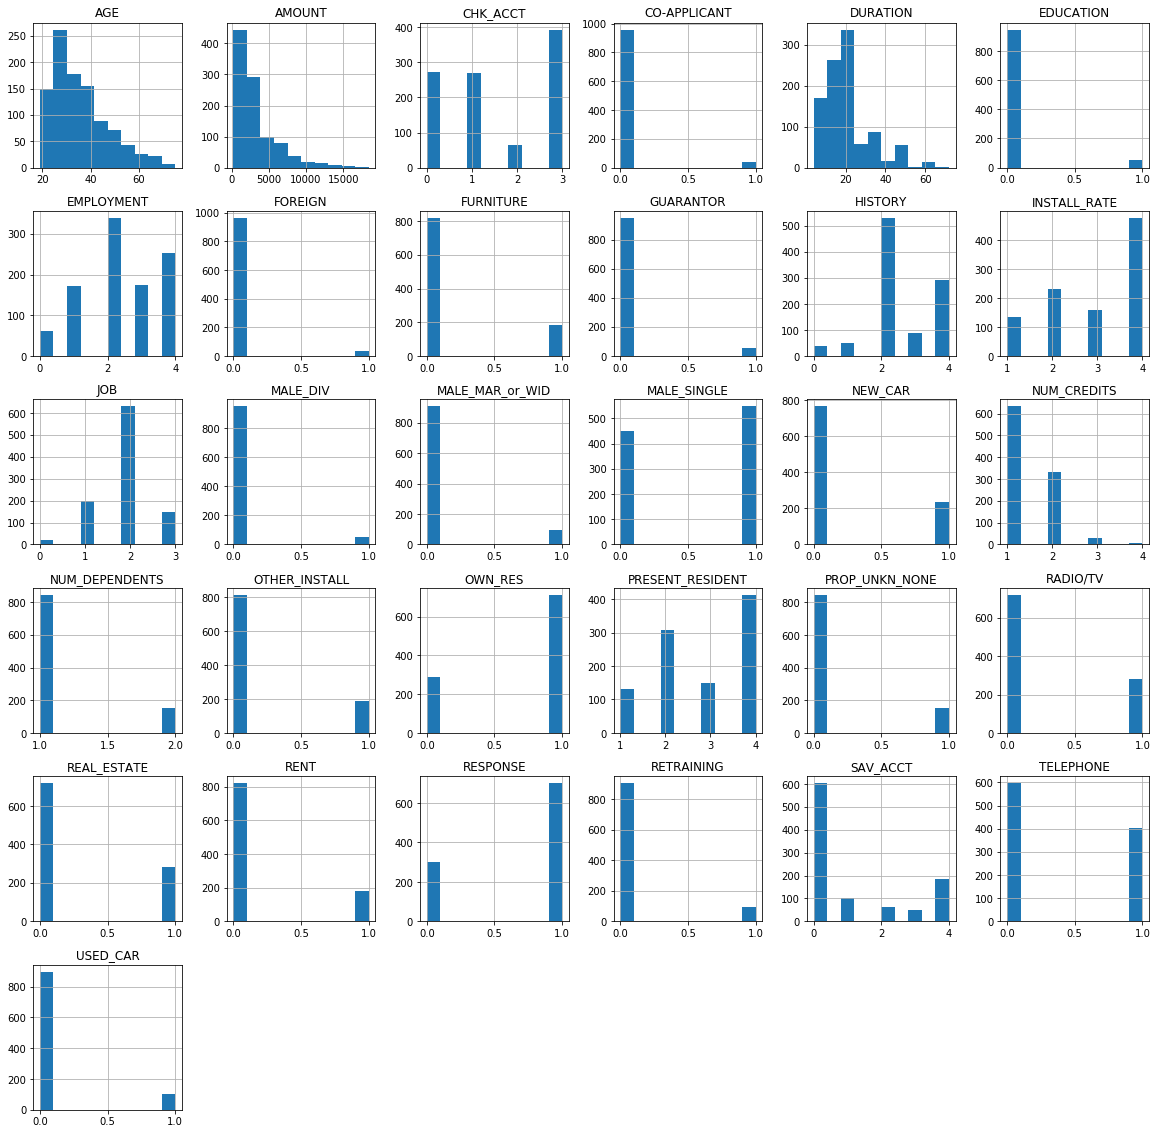

In [61]:
data.hist(figsize=(20,20))

Need to describe unexpected findings

## 2.e. How many people have good credit?

In [62]:
data.groupby('RESPONSE').size()

RESPONSE
0    300
1    700
dtype: int64

There is 700 people with good credit.

## 2.f. Remove unnecessary columns.

In [63]:
data =data.drop(['FOREIGN', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'RETRAINING', 'TELEPHONE', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID'], axis=1)
data.head()

CHK_ACCT  DURATION  EDUCATION  AMOUNT  SAV_ACCT  EMPLOYMENT  INSTALL_RATE  \
0         0         6          0    1169         4           4             4   
1         1        48          0    5951         0           2             2   
2         3        12          1    2096         0           3             2   
3         0        42          0    7882         0           3             2   
4         0        24          0    4870         0           2             3   

   CO-APPLICANT  GUARANTOR  PRESENT_RESIDENT  REAL_ESTATE  PROP_UNKN_NONE  \
0             0          0                 4            1               0   
1             0          0                 2            1               0   
2             0          0                 3            1               0   
3             0          1                 4            0               0   
4             0          0                 4            0               1   

   AGE  OTHER_INSTALL  RENT  OWN_RES  NUM_CREDITS  JOB  NUM_DEPENDENTS  \
0   67              0     0        1            2    2               1   
1   22              0     0        1            1    2               1   
2   49              0     0        1            1    1               2   
3   45              0     0        0            1    2               2   
4   53              0     0        0            2    2               2   

   RESPONSE  
0         1  
1         0  
2         1  
3         1  
4         0

## 2.g. Rename columns.

In [64]:
data = data.rename(columns={'CHK_ACCT': 'CHECKING ACCOUNT'})
data = data.rename(columns={'SAV_ACCT': 'SAVINGS ACCOUNT'})
data = data.rename(columns={'DURATION': 'DUR'})
data.head()

CHECKING ACCOUNT  DUR  EDUCATION  AMOUNT  SAVINGS ACCOUNT  EMPLOYMENT  \
0                 0    6          0    1169                4           4   
1                 1   48          0    5951                0           2   
2                 3   12          1    2096                0           3   
3                 0   42          0    7882                0           3   
4                 0   24          0    4870                0           2   

   INSTALL_RATE  CO-APPLICANT  GUARANTOR  PRESENT_RESIDENT  REAL_ESTATE  \
0             4             0          0                 4            1   
1             2             0          0                 2            1   
2             2             0          0                 3            1   
3             2             0          1                 4            0   
4             3             0          0                 4            0   

   PROP_UNKN_NONE  AGE  OTHER_INSTALL  RENT  OWN_RES  NUM_CREDITS  JOB  \
0               0   67              0     0        1            2    2   
1               0   22              0     0        1            1    2   
2               0   49              0     0        1            1    1   
3               0   45              0     0        0            1    2   
4               1   53              0     0        0            2    2   

   NUM_DEPENDENTS  RESPONSE  
0               1         1  
1               1         0  
2               2         1  
3               2         1  
4               2         0

## 2.h. Create new columns based on existing columns.

In [65]:
data['AVERAGE AMOUNT PER SAVINGS ACCOUNT'] = data['AMOUNT'] / data['SAVINGS ACCOUNT']
data.head()

CHECKING ACCOUNT  DUR  EDUCATION  AMOUNT  SAVINGS ACCOUNT  EMPLOYMENT  \
0                 0    6          0    1169                4           4   
1                 1   48          0    5951                0           2   
2                 3   12          1    2096                0           3   
3                 0   42          0    7882                0           3   
4                 0   24          0    4870                0           2   

   INSTALL_RATE  CO-APPLICANT  GUARANTOR  PRESENT_RESIDENT  ...  \
0             4             0          0                 4  ...   
1             2             0          0                 2  ...   
2             2             0          0                 3  ...   
3             2             0          1                 4  ...   
4             3             0          0                 4  ...   

   PROP_UNKN_NONE  AGE  OTHER_INSTALL  RENT  OWN_RES  NUM_CREDITS  JOB  \
0               0   67              0     0        1            2    2   
1               0   22              0     0        1            1    2   
2               0   49              0     0        1            1    1   
3               0   45              0     0        0            1    2   
4               1   53              0     0        0            2    2   

   NUM_DEPENDENTS  RESPONSE  AVERAGE AMOUNT PER SAVINGS ACCOUNT  
0               1         1                              292.25  
1               1         0                                 inf  
2               2         1                                 inf  
3               2         1                                 inf  
4               2         0                                 inf  

[5 rows x 21 columns]

## 2.i. Create 3 bins using the amount column and label them as 1, 2, and 3

In [66]:
data['AMOUNT'] = pd.qcut(data['AMOUNT'], 3, labels=['1', '2', '3'])
data.head()

CHECKING ACCOUNT  DUR  EDUCATION AMOUNT  SAVINGS ACCOUNT  EMPLOYMENT  \
0                 0    6          0      1                4           4   
1                 1   48          0      3                0           2   
2                 3   12          1      2                0           3   
3                 0   42          0      3                0           3   
4                 0   24          0      3                0           2   

   INSTALL_RATE  CO-APPLICANT  GUARANTOR  PRESENT_RESIDENT  ...  \
0             4             0          0                 4  ...   
1             2             0          0                 2  ...   
2             2             0          0                 3  ...   
3             2             0          1                 4  ...   
4             3             0          0                 4  ...   

   PROP_UNKN_NONE  AGE  OTHER_INSTALL  RENT  OWN_RES  NUM_CREDITS  JOB  \
0               0   67              0     0        1            2    2   
1               0   22              0     0        1            1    2   
2               0   49              0     0        1            1    1   
3               0   45              0     0        0            1    2   
4               1   53              0     0        0            2    2   

   NUM_DEPENDENTS  RESPONSE  AVERAGE AMOUNT PER SAVINGS ACCOUNT  
0               1         1                              292.25  
1               1         0                                 inf  
2               2         1                                 inf  
3               2         1                                 inf  
4               2         0                                 inf  

[5 rows x 21 columns]

## 2.j. Change the data type of RESPONSE

In [67]:
data['RESPONSE'] = data['RESPONSE'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
CHECKING ACCOUNT                      1000 non-null int64
DUR                                   1000 non-null int64
EDUCATION                             1000 non-null int64
AMOUNT                                1000 non-null category
SAVINGS ACCOUNT                       1000 non-null int64
EMPLOYMENT                            1000 non-null int64
INSTALL_RATE                          1000 non-null int64
CO-APPLICANT                          1000 non-null int64
GUARANTOR                             1000 non-null int64
PRESENT_RESIDENT                      1000 non-null int64
REAL_ESTATE                           1000 non-null int64
PROP_UNKN_NONE                        1000 non-null int64
AGE                                   1000 non-null int64
OTHER_INSTALL                         1000 non-null int64
RENT                                  1000 non-null int64
OWN_RES              

## 2.k. Replace 0 and 1 with false and true respectively 

In [68]:
data['RESPONSE'] = data['RESPONSE'].replace('0','False')
data['RESPONSE'] = data['RESPONSE'].replace('1','True')
data.head()

CHECKING ACCOUNT  DUR  EDUCATION AMOUNT  SAVINGS ACCOUNT  EMPLOYMENT  \
0                 0    6          0      1                4           4   
1                 1   48          0      3                0           2   
2                 3   12          1      2                0           3   
3                 0   42          0      3                0           3   
4                 0   24          0      3                0           2   

   INSTALL_RATE  CO-APPLICANT  GUARANTOR  PRESENT_RESIDENT  ...  \
0             4             0          0                 4  ...   
1             2             0          0                 2  ...   
2             2             0          0                 3  ...   
3             2             0          1                 4  ...   
4             3             0          0                 4  ...   

   PROP_UNKN_NONE  AGE  OTHER_INSTALL  RENT  OWN_RES  NUM_CREDITS  JOB  \
0               0   67              0     0        1            2    2   
1               0   22              0     0        1            1    2   
2               0   49              0     0        1            1    1   
3               0   45              0     0        0            1    2   
4               1   53              0     0        0            2    2   

   NUM_DEPENDENTS  RESPONSE AVERAGE AMOUNT PER SAVINGS ACCOUNT  
0               1      True                             292.25  
1               1     False                                inf  
2               2      True                                inf  
3               2      True                                inf  
4               2     False                                inf  

[5 rows x 21 columns]

## 2.l. Filter rows using a criterion

In [69]:
# filtering based on people whose loan is in bin 3
data[(data['AMOUNT'] == '3')]

CHECKING ACCOUNT  DUR  EDUCATION AMOUNT  SAVINGS ACCOUNT  EMPLOYMENT  \
1                   1   48          0      3                0           2   
3                   0   42          0      3                0           3   
4                   0   24          0      3                0           2   
5                   3   36          1      3                4           2   
7                   1   36          0      3                0           2   
9                   1   30          0      3                0           0   
11                  0   48          0      3                0           1   
17                  0   30          0      3                4           1   
18                  1   24          0      3                0           4   
19                  3   24          0      3                2           4   
29                  0   60          0      3                0           4   
31                  0   24          0      3                0           2   
32                  1   18          0      3                1           2   
35                  1   45          0      3                0           1   
36                  3   48          1      3                0           2   
42                  1   18          0      3                0           2   
43                  0   30          0      3                1           3   
44                  0   48          0      3                0           4   
48                  3   11          0      3                0           2   
51                  1   27          0      3                0           4   
53                  3   18          0      3                4           2   
56                  1   12          0      3                4           0   
57                  3   36          0      3                0           2   
59                  0   36          0      3                0           1   
63                  1   48          0      3                0           2   
65                  3   27          0      3                4           4   
70                  3   36          0      3                0           2   
73                  1   42          0      3                0           3   
76                  0   42          0      3                0           1   
77                  1   11          0      3                0           3   
..                ...  ...        ...    ...              ...         ...   
915                 1   48          0      3                0           2   
917                 0    6          0      3                0           4   
921                 3   48          0      3                2           3   
924                 0   24          0      3                0           1   
927                 0   48          0      3                0           3   
938                 1   60          1      3                0           2   
939                 3   24          0      3                4           2   
940                 3   12          0      3                4           1   
945                 1   48          0      3                2           1   
949                 3   24          0      3                1           4   
950                 1   18          0      3                0           0   
952                 1   24          0      3                2           1   
953                 3   36          0      3                0           0   
956                 2   30          0      3                4           4   
958                 0   28          0      3                0           2   
962                 3   15          0      3                4           2   
967                 3   15          0      3                0           4   
968                 3   42          0      3                4           3   
969                 0   11          0      3                0           2   
971                 3   24          0      3                0           2   
9

## 2.m. Filter rows using two criterion

In [70]:
# filtering based on people with a loan in bin 3 and whose age is less than 25
data[(data['AMOUNT'] == '3') & (data['AGE'] < 25)]

CHECKING ACCOUNT  DUR  EDUCATION AMOUNT  SAVINGS ACCOUNT  EMPLOYMENT  \
1                   1   48          0      3                0           2   
11                  0   48          0      3                0           1   
43                  0   30          0      3                1           3   
59                  0   36          0      3                0           1   
79                  1   30          0      3                0           1   
93                  2   24          0      3                4           4   
118                 0   33          0      3                2           2   
130                 1   48          0      3                4           3   
134                 3   60          0      3                1           3   
152                 2   36          0      3                0           2   
208                 0   24          0      3                0           2   
217                 2   36          0      3                0           2   
236                 1    6          0      3                4           0   
242                 0   48          0      3                0           4   
258                 3   15          0      3                1           1   
296                 3   12          0      3                4           1   
306                 3   30          0      3                4           3   
332                 1   60          0      3                1           1   
333                 3   48          0      3                1           2   
334                 0   24          0      3                0           4   
340                 1   24          1      3                0           1   
347                 1   24          0      3                2           0   
367                 0   18          0      3                0           1   
417                 0   18          1      3                4           2   
480                 1   12          0      3                0           2   
517                 3   36          0      3                0           1   
523                 3   24          0      3                1           3   
613                 0   24          0      3                0           2   
618                 1   30          0      3                1           2   
637                 3   60          0      3                0           3   
655                 0   14          0      3                0           0   
677                 1   72          0      3                1           2   
706                 1   48          0      3                1           3   
736                 1   24          0      3                0           2   
802                 0   20          0      3                0           4   
804                 1   12          0      3                4           0   
805                 0   36          0      3                0           3   
812                 0   36          0      3                0           3   
887                 1   48          0      3                0           2   
906                 0   21          0      3                4           3   

     INSTALL_RATE  CO-APPLICANT  GUARANTOR  PRESENT_RESIDENT  ...  \
1               2             0          0                 2  ...   
11              3             0          0                 4  ...   
43              1             0          0                 4  ...   
59              4             1          0                 4  ...   
79              2             0          0                 1  ...   
93              4             1          0                 4  ...   
118             1             0          0                 4  ...   
130             1             0          0                 2  ...   
134             2             0          0                 4  ...   
152             4             0          0                 1  ...   
208             2             0          0                 2  ...   
217             2  

## 2.n.  Sample 20 rows and export them to csv or excel file. 

In [71]:
# create sample data
data_20 = data.sample(20, random_state=1)
data_20

CHECKING ACCOUNT  DUR  EDUCATION AMOUNT  SAVINGS ACCOUNT  EMPLOYMENT  \
507                 1   15          0      3                1           0   
818                 0   36          0      3                0           0   
452                 3   12          0      2                0           4   
368                 0   36          0      3                0           4   
242                 0   48          0      3                0           4   
929                 0   12          0      1                0           2   
262                 0   18          0      3                0           4   
810                 1    8          0      1                0           1   
318                 3   12          1      1                0           2   
49                  3   12          0      2                1           2   
446                 0   36          0      2                0           1   
142                 0   27          0      3                0           2   
968                 3   42          0      3                4           3   
345                 3   15          0      1                0           2   
971                 3   24          0      3                0           2   
133                 3   18          0      2                0           2   
104                 3   12          0      2                4           1   
6                   3   24          0      2                2           4   
600                 1    7          0      2                0           1   
496                 1   36          0      3                1           1   

     INSTALL_RATE  CO-APPLICANT  GUARANTOR  PRESENT_RESIDENT  ...  \
507             1             0          0                 2  ...   
818             2             1          0                 3  ...   
452             2             0          0                 4  ...   
368             4             0          0                 2  ...   
242             3             0          0                 4  ...   
929             4             0          0                 2  ...   
262             2             0          0                 4  ...   
810             3             0          0                 2  ...   
318             4             0          0                 2  ...   
49              4             1          0                 2  ...   
446             4             0          0                 4  ...   
142             3             0          0                 2  ...   
968             2             0          0                 4  ...   
345             4             0          0                 2  ...   
971             1             0          0                 4  ...   
133             4             0          0                 4  ...   
104             2             0          0                 4  ...   
6               3             0          0                 4  ...   
600             1             0          1                 1  ...   
496             4             1          0                 1  ...   

     PROP_UNKN_NONE  AGE  OTHER_INSTALL  RENT  OWN_RES  NUM_CREDITS  JOB  \
507               0   34              0     0        1            1    3   
818               0   43              0     0        1            1    3   
452               0   34              0     0        1            2    2   
368               0   42              0     0        1            1    2   
242               1   24              0     0        0            2    2   
929               0   43              0     0        1            2    1   
262               1   36              0     0        0            3    3   
810               0   26              0     0        1            1    2   
318               0   32              0     0        1            2    2   
49                0   28              0     0        1            1    2   
446               0   34              0     0        1            1    2   
142               0   27 

In [72]:
# save as csv
data_20.to_csv("data/data_20.csv")

## 3.a. Import both datasets

In [73]:
restaurant_c = pd.read_excel("data/customer.xls")
restaurant_o = pd.read_excel("data/order.xls")

## 3.b. Identify the primary (or common) key for joining

In [74]:
#show each dataset
restaurant_c.head()

CustomerID FirstName  LastName                  Email        DOB  \
0           1      John     Smith   John.Smith@yahoo.com 1968-02-04   
1           2    Steven  Goldfish  goldfish@fishhere.net 1974-04-04   
2           3     Paula     Brown    pb@herowndomain.org 1978-05-24   
3           4     James     Smith     jim@supergig.co.uk 1980-02-10   

          Phone  
0  626 222-2222  
1  323 455-4545  
2  416 323-3232  
3  416 323-8888

In [75]:
#show each dataset
restaurant_o.head()

CustomerID  Order_Id  OrderNo
0           3         1    77895
1           3         2    44678
2           1         3    22456
3           1         4    24562
4          15         5    34764

The primary key is CustomerID.

## 3.c. Perform inner join, left join, and right join. Discuss the results of the three types of join 

In [76]:
# inner join
restaurant_c.merge(restaurant_o, on='CustomerID', how= 'inner')

CustomerID FirstName LastName                 Email        DOB  \
0           1      John    Smith  John.Smith@yahoo.com 1968-02-04   
1           1      John    Smith  John.Smith@yahoo.com 1968-02-04   
2           3     Paula    Brown   pb@herowndomain.org 1978-05-24   
3           3     Paula    Brown   pb@herowndomain.org 1978-05-24   

          Phone  Order_Id  OrderNo  
0  626 222-2222         3    22456  
1  626 222-2222         4    24562  
2  416 323-3232         1    77895  
3  416 323-3232         2    44678

In [77]:
# left join
restaurant_c.merge(restaurant_o, on='CustomerID', how= 'left')

CustomerID FirstName  LastName                  Email        DOB  \
0           1      John     Smith   John.Smith@yahoo.com 1968-02-04   
1           1      John     Smith   John.Smith@yahoo.com 1968-02-04   
2           2    Steven  Goldfish  goldfish@fishhere.net 1974-04-04   
3           3     Paula     Brown    pb@herowndomain.org 1978-05-24   
4           3     Paula     Brown    pb@herowndomain.org 1978-05-24   
5           4     James     Smith     jim@supergig.co.uk 1980-02-10   

          Phone  Order_Id  OrderNo  
0  626 222-2222       3.0  22456.0  
1  626 222-2222       4.0  24562.0  
2  323 455-4545       NaN      NaN  
3  416 323-3232       1.0  77895.0  
4  416 323-3232       2.0  44678.0  
5  416 323-8888       NaN      NaN

In [78]:
# right join
restaurant_c.merge(restaurant_o, on='CustomerID', how= 'right')

CustomerID FirstName LastName                 Email        DOB  \
0           1      John    Smith  John.Smith@yahoo.com 1968-02-04   
1           1      John    Smith  John.Smith@yahoo.com 1968-02-04   
2           3     Paula    Brown   pb@herowndomain.org 1978-05-24   
3           3     Paula    Brown   pb@herowndomain.org 1978-05-24   
4          15       NaN      NaN                   NaN        NaT   

          Phone  Order_Id  OrderNo  
0  626 222-2222         3    22456  
1  626 222-2222         4    24562  
2  416 323-3232         1    77895  
3  416 323-3232         2    44678  
4           NaN         5    34764

##### Results
Inner join includes only the rows where both datasets contain the common key.
Left join includes all the customer id's that the first dataset contains and gives NA for missing information.
Right join includes all the customer id's that the second data contains and gives NA for missing information from the first dataset.

Inner join is the best practice for this.

## 3.d. What’s the purpose of Join? 

The purpose of join is to combine two different datasets where each of them share some sort of commonality. This could be keys such as purchase order, customer ID, or serial number.